In [3]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 1: Linear Regression

In [219]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [132]:
# Load house data
house_prices  = read_csv("ex1data2.txt",header=None)
house_prices.head() #check it looks ok

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [133]:
hp_mean = house_prices.mean()
hp_std = house_prices.std()

In [134]:
# Normalize the data
ncols = len(house_prices.columns)
def normalize(group, mean, std):
    return (group - mean) / std
hp_norm = normalize(house_prices, hp_mean, hp_std)

In [135]:
hp_norm.columns = ['area','bedrooms','price']
hp_norm.head()# Check to make sure norm data looks okay

,area,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [146]:
# Convert to numpy arrays and split into X and y
y_m = hp_norm.values[:,-1]
X_m = hp_norm.values[:,0:2]
X_m = np.insert(X_m,0,1,axis=1) # insert bias term
y_m.shape=(y_m.size,1) # make sure shape is correct
y_m.shape # Check dimensions

(47L, 1L)

In [126]:
# np.matmul(np.transpose(X_m),y_m) #testing

array([-5.10702591e-15,  3.93294293e+01,  2.03440114e+01])

In [46]:
#np.zeros((3,1))-np.transpose(np.matmul(np.transpose(np.matmul(X_m,np.zeros((3,1)))),X_m)) #testing

array([[0.],
       [0.],
       [0.]])

In [95]:
#1/float(y_m.size) #testing

0.02127659574468085

In [108]:
# np.transpose(np.matmul(X_m,np.zeros((3,1)))-y_m) #testing

array([[-0.47574687,  0.08407444, -0.22862575,  0.86702453, -1.59538948,
         0.32399786,  0.20403615,  1.13094828,  1.02697347,  0.78305133,
         0.80305294, -0.05268191,  0.08328269, -2.87498104,  0.64389575,
        -0.87561923,  0.32399786,  1.12374258, -1.27627534, -2.06803861,
         0.69987788,  0.68308324,  0.77985235,  0.64389575, -1.86730269,
         0.72387022, -0.99238196, -1.02837047, -1.07635515,  0.32399786,
        -0.0758745 ,  1.363666  ,  0.20403615, -1.91528737,  0.43596212,
         0.72387022,  0.88381916, -0.03668701, -1.66816625,  0.42716493,
        -0.22462702,  0.08407444,  0.21123385,  0.33119556,  1.28369153,
         0.32399786,  0.80704367]])

In [193]:
# Define cost function
def cost_function(X,y,theta):
    temp1 = np.power((np.matmul(X,theta)-y),2)
    J=(1/float(2*y.size))*np.sum(temp1)
    return J

In [213]:
# test = np.zeros((5,2))
# test[1,0]

In [214]:
# Linear regression function via gradient descent
def gradient_descent_linreg(X,y,theta,alpha,num_iters):
    Jplot=np.zeros((num_iters,2)) # set up the array for keeping track of cost function
    for i in range(0,num_iters): 
        theta_prev = theta
        temp1 = (1/float(y.size))*np.matmul(np.transpose(np.matmul(X,theta_prev)-y),X)
        theta = theta_prev-alpha*np.transpose(temp1)
        Jplot[i,0] = i
        Jplot[i,1] = cost_function(X,y,theta) # record cost function for each iteration
    return theta, Jplot

In [237]:
#Check it's working, no errors
(theta_final, Jplot) = gradient_descent_linreg(X_m,y_m,np.zeros((3, 1)),1,50)

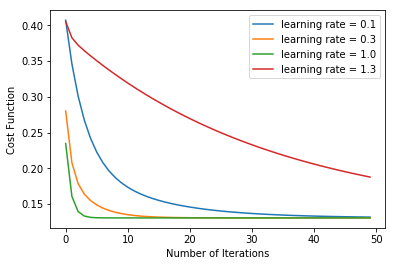

In [256]:
#Try different alphas
alpha_test = [0.1, 0.3, 1, 1.3]
for i in range(0,4):
    at = alpha_test[i]
    (theta_final, Jplot) = gradient_descent_linreg(X_m,y_m,np.zeros((3, 1)),at,50)
    plt.plot(Jplot[:,0], Jplot[:,1], label='learning rate = '+ '%.1f' % at)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plot.legend(loc='upper right')

In [305]:
# Test on new data: Area = 1650 ft, Number of bedrooms = 3

#run gradient descent using optimzed alpha and iterations
(theta_final, Jplot) = gradient_descent_linreg(X_m,y_m,np.zeros((3, 1)),1,30)

X_new = [1650, 3] # new data
X_new_n = (X_new - hp_mean.values[0:2])/hp_std.values[0:2] #normalize
X_new_n #check

array([-0.4412732 , -0.22367519])

In [306]:
X_newn = np.append([1],X_new_n)

In [307]:
Price_pn = np.matmul(X_newn,theta_final) #predicted price, in normalized units
# Convert to original units
Price_p = (Price_pn*hp_std.values[2])+hp_mean.values[2]
Price_p

array([293081.46507336])

Text(0,0.5,'House Price')

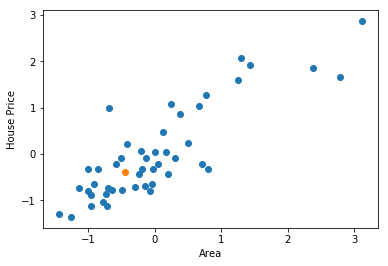

In [324]:
#Check visually along first dimension
plt.scatter(X_m[:,1], y_m[:])
plot.scatter(X_newn[1], Price_pn)
plt.xlabel('Area')
plt.ylabel('House Price')